<a href="https://colab.research.google.com/github/Maureen36Mathenge/Determine-survival-rates-on-the-Titanic-dataset-/blob/master/Moringa_Week_9_IP_%22Predicting_the_survival_chances%22_Maureen_Mathenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Defining the Question


##a)Specifying the Data Analytic Question

Give insights based on the dataset

##b)Defining the Metric for Success

Create an accurate model that shall predict the survival chances 

##c)Understanding the context

The Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean.
It had received six warnings of sea ice on 14 April but was travelling near her maximum speed when her lookouts sighted the iceberg.
It was unabl to turn quickly enough hence leading to glancing blow that buckled her starboard side and opened six of her sixteen compartments to the sea


##d)Recording the Experimental Design

I shall incorporate the CRISPS-DM in my analysis

#Feature Description

pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)

survival        Survival
                (0 = No; 1 = Yes)

name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)


#Import Libraries

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [363]:
#Upload the dataset
df = pd.read_csv("train (5).csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Reading the data

In [364]:
# creating a list of dataframe columns 
clmn = list(df) 
  
for i in clmn: 
    # printing a third element of column 
    print(df[i].unique()) 

  #This are the features i will work with

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [365]:
#check the data types for all the variables 
df.dtypes

#Survived,Pclass SibSp,Parch have the dataset integer
#Sex and Embarked are strings
#Age is a float     

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
#Label encode every column that is categorical
df['Sex'].replace(['male', 'female'],[1,0],inplace=True)
df['Embarked'].replace(['S', 'C','Q'],[0,1,2],inplace=True)

#Its neccesary for modelling

In [367]:
#Check if the label encoding is working 
df.sample(10)

#The label encodind has worked 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",0,21.00,2,2,PC 17608,262.375,B57 B59 B63 B66,1.0
585,586,1,1,"Taussig, Miss. Ruth",0,18.00,0,2,110413,79.650,E68,0.0
848,849,0,2,"Harper, Rev. John",1,28.00,0,1,248727,33.000,NaN,0.0
811,812,0,3,"Lester, Mr. James",1,39.00,0,0,A/4 48871,24.150,NaN,0.0
70,71,0,2,"Jenkin, Mr. Stephen Curnow",1,32.00,0,0,C.A. 33111,10.500,NaN,0.0
491,492,0,3,"Windelov, Mr. Einar",1,21.00,0,0,SOTON/OQ 3101317,7.250,NaN,0.0
788,789,1,3,"Dean, Master. Bertram Vere",1,1.00,1,2,C.A. 2315,20.575,NaN,0.0
748,749,0,1,"Marvin, Mr. Daniel Warner",1,19.00,1,0,113773,53.100,D30,0.0
468,469,0,3,"Scanlan, Mr. James",1,NaN,0,0,36209,7.725,NaN,2.0
831,832,1,2,"Richards, Master. George Sibley",1,0.83,1,1,29106,18.750,NaN,0.0


In [368]:
df.shape
#We have 891 rows and 8 columns to work with 

(891, 12)

#Data Preparation

##1)Validity

In [369]:
#Get columns that only numerical
#This is neccesary since boxplots do not work for categorical data
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.head()
#Perfect!

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


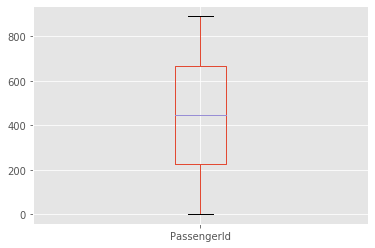

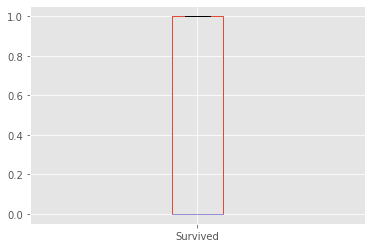

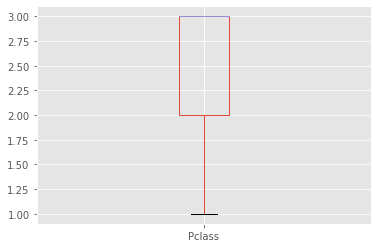

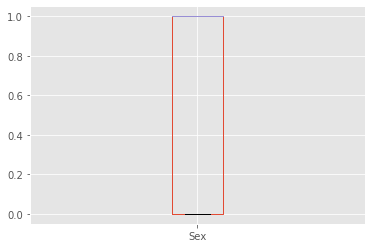

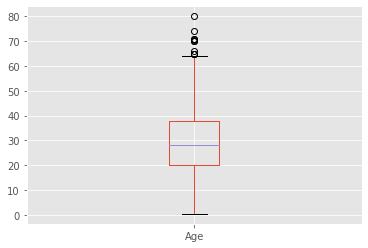

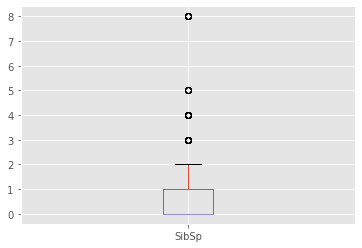

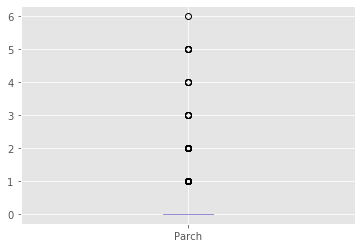

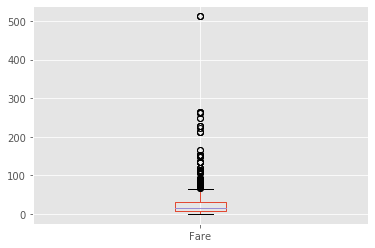

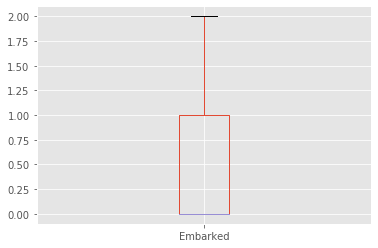

In [370]:
#Check for OUTLIERS 
for column in df_num:
    plt.figure()
    df_num.boxplot([column])

In [371]:
#Checking some outliers
df[df['Fare'] >= 500]

#I shall work with the data as it is
#This is because all those people who were charged more than 500 dollars belonged to the 1st class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,NaN,1.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,B51 B53 B55,1.0
737,738,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,B101,1.0


##2)Completeness

In [372]:
#Check for pesence of m issing values
df.isnull().sum()

#The column age has 177 missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [373]:
#Filling the null values 
#Since our aim is to create a KNN model we need to fill null values
df = df.fillna(df.mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##3)Consistency

In [374]:
#check for duplicates from the dataset
df.duplicated().sum()

0

#Exploratory Data Analysis

##Univariate Analysis

I am performing this analysis to get insights on the dataset



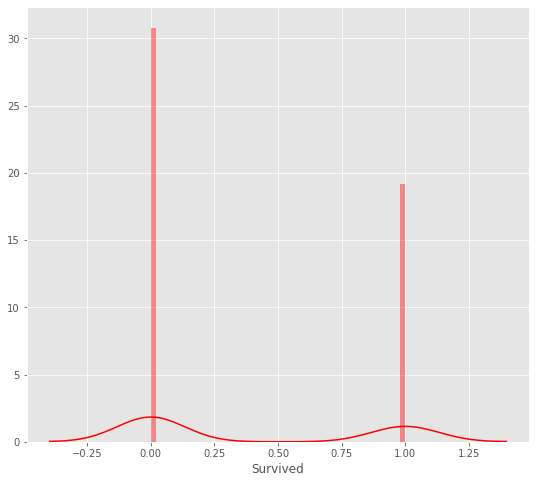

In [375]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Survived'], color='r', bins=50, hist_kws={'alpha': 0.4});

Majority of the people that had boarded did not survive 
549 people died while 342 people survived 

In [376]:
df.groupby(df['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

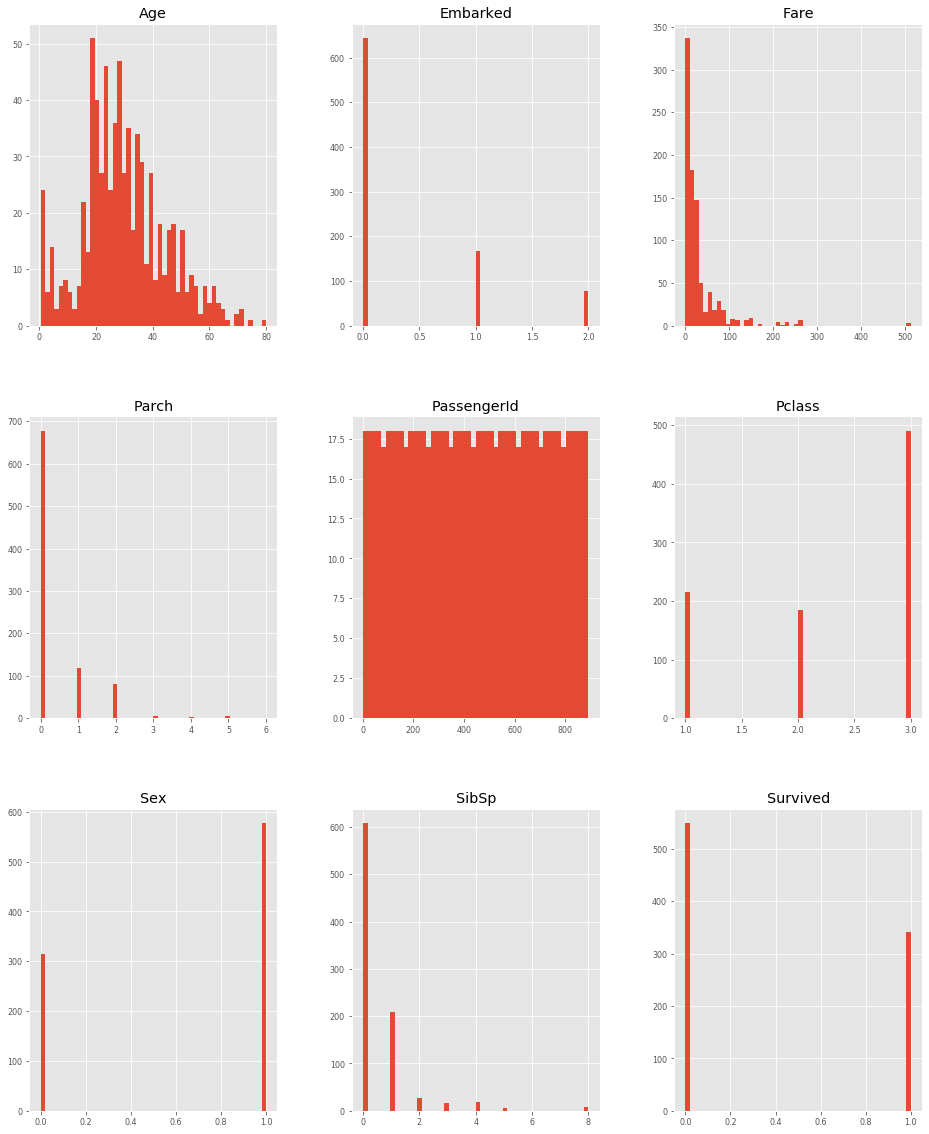

In [377]:
#We can now plot the histograms
#print(df_num["Age"].max())
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Majority of the people were aged between 18 - 40
Also many people that had boarded died during the incident 
Most of the people were in the 3rd class

##Bivariate Analysis

Text(0.5, 1.0, 'People that did not Survive')

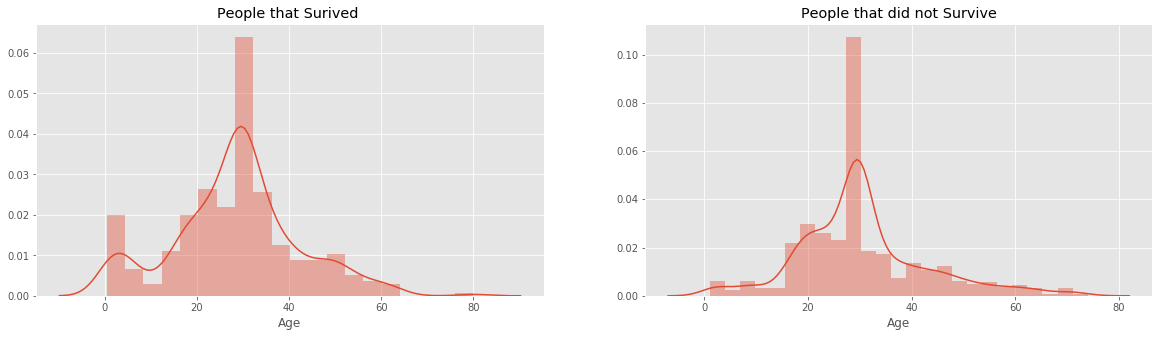

In [378]:
#Checking the missing the people that survived based on their age 
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(df[df['Survived']==1].Age,ax=ax[0])
ax[0].set_title('People that Surived ')
sns.distplot(df[df['Survived']==0].Age,ax=ax[1])
ax[1].set_title('People that did not Survive')

#Most of the children survived compared to the elder people
#Majority of the people that died 20 and 40


Text(0.5, 1.0, 'People that did not Survive based on Passenger_class')

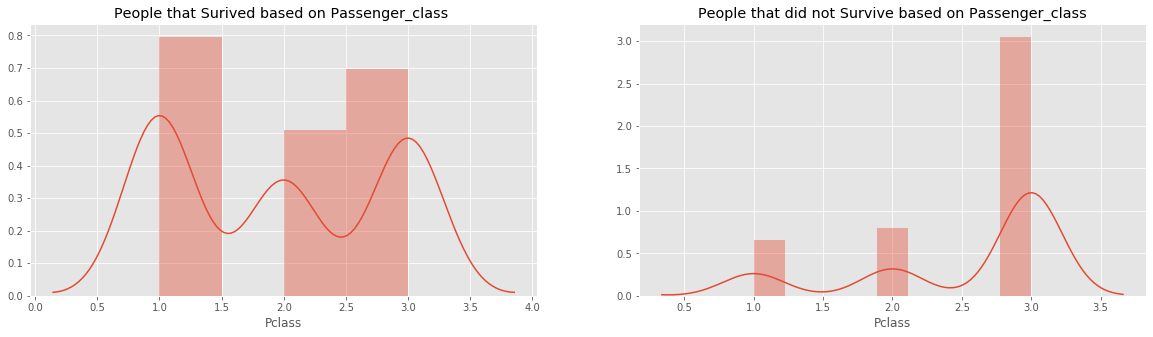

In [379]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(df[df['Survived']==1].Pclass,ax=ax[0])
ax[0].set_title('People that Surived based on Passenger_class ')
sns.distplot(df[df['Survived']==0].Pclass,ax=ax[1])
ax[1].set_title('People that did not Survive based on Passenger_class')

In [380]:
df.groupby(['Survived','Pclass'])['Pclass'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

Most of the people that were onboard were in the 3rd class. 372 people in 3rd class lost their lives
More than half in first class survived
For the second class,half of the people survived 

Text(0.5, 1.0, 'People that did not Survive based on gender')

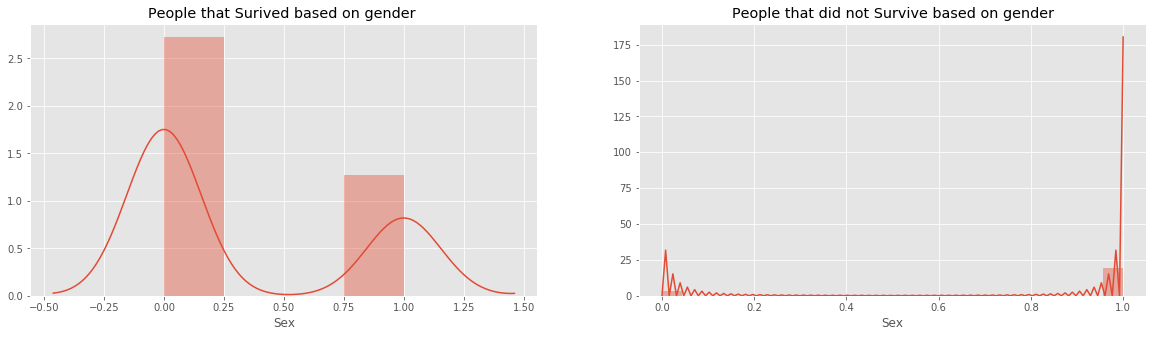

In [381]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(df[df['Survived']==1].Sex,ax=ax[0])
ax[0].set_title('People that Surived based on gender ')
sns.distplot(df[df['Survived']==0].Sex,ax=ax[1])
ax[1].set_title('People that did not Survive based on gender')

In [382]:
#Between males and females who survived 
df.groupby(["Survived","Sex"])["Sex"].count()

#More males lost their lives

Survived  Sex
0         0       81
          1      468
1         0      233
          1      109
Name: Sex, dtype: int64

In [383]:
#Checking the total number of males and females boarded
df.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
0,314,314,314,314,314,314,314,314,314,97,314
1,577,577,577,577,577,577,577,577,577,107,577


In [384]:
#Check the rows that have siblings and spouses == 8 
df[df['SibSp'] == 8]

#The bigger the family,the likelihood of them dying increases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",1,29.699118,8,2,CA. 2343,69.55,NaN,0.0
180,181,0,3,"Sage, Miss. Constance Gladys",0,29.699118,8,2,CA. 2343,69.55,NaN,0.0
201,202,0,3,"Sage, Mr. Frederick",1,29.699118,8,2,CA. 2343,69.55,NaN,0.0
324,325,0,3,"Sage, Mr. George John Jr",1,29.699118,8,2,CA. 2343,69.55,NaN,0.0
792,793,0,3,"Sage, Miss. Stella Anna",0,29.699118,8,2,CA. 2343,69.55,NaN,0.0
846,847,0,3,"Sage, Mr. Douglas Bullen",1,29.699118,8,2,CA. 2343,69.55,NaN,0.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,29.699118,8,2,CA. 2343,69.55,NaN,0.0


###Assumptions


1.   Majority of the males died trying to save the children and women 
2.   Most deaths were males since they were the biggest number in the ship 
3.   Larger families died due to them trying to save one another or being in a dilemma of saving themselves or the family






             PassengerId  Survived    Pclass  ...     Parch      Fare  Embarked
PassengerId     1.000000 -0.005007 -0.035144  ... -0.001652  0.012658 -0.030479
Survived       -0.005007  1.000000 -0.338481  ...  0.081629  0.257307  0.108472
Pclass         -0.035144 -0.338481  1.000000  ...  0.018443 -0.549500  0.043714
Sex             0.042939 -0.543351  0.131900  ... -0.245489 -0.182333 -0.118347
Age             0.033207 -0.069809 -0.331339  ... -0.179191  0.091566  0.009464
SibSp          -0.057527 -0.035322  0.083081  ...  0.414838  0.159651 -0.060591
Parch          -0.001652  0.081629  0.018443  ...  1.000000  0.216225 -0.079300
Fare            0.012658  0.257307 -0.549500  ...  0.216225  1.000000  0.063396
Embarked       -0.030479  0.108472  0.043714  ... -0.079300  0.063396  1.000000

[9 rows x 9 columns]


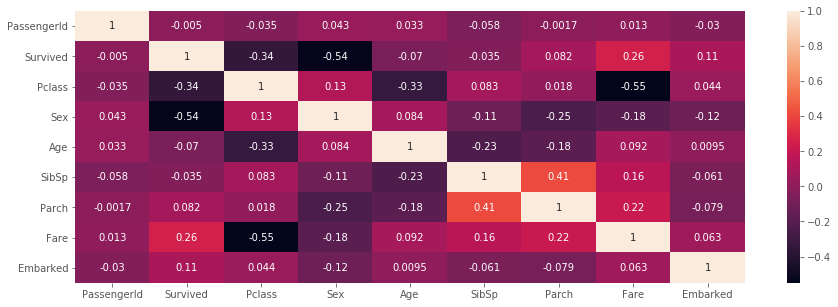

In [385]:
#Correlation 
print(df.corr())
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

#Our variables are not strongly correlated 
#We can work with them 

##K-Nearest Neighbour (KNN)

###Baseline Model

In [0]:
#Create your dependent and independent variable 
y = df[["Survived"]]
X = df.drop(["Survived","PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

#I went ahead and dropped the columns above since they really do not attribute to i knowing if the passangers survived of not 
#When doing the visualization the columns we are left with compensate for the dropped ones 

In [0]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =50)

In [0]:
#Feature Scale the data
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#We shall normalise the data within a particular range
#Sometimes, it also helps in speeding up the calculations in an algorithm.

In [389]:
 #Create the model
 from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [391]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7877094972067039
[[90 11]
 [27 51]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       101
           1       0.82      0.65      0.73        78

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179



I was able to achieve an accuracy of 79%

## Second Model 

In [0]:
#Create your dependent and independent variable 
y = df[["Survived"]]
X = df.drop(["Survived","PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

#I went ahead and dropped the columns above since they really do not attribute to i knowing if the passangers survived of not 
#When doing the visualization the columns we are left with compensate for the dropped ones 

In [0]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state =50)

In [0]:
#Feature Scale the data
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [395]:
#Create the model
 from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [397]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8134328358208955
[[150  12]
 [ 38  68]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       162
           1       0.85      0.64      0.73       106

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.81      0.81       268



After changing KNN to 8 and testing using 0.3,my model improved from 79% to 81%

#Challenging the solution / Implementing the Solution

When any shipwright is creating the ship,they should consider putting equal life saving resources with the number people in the boat
They should also be equally distributed

They should create the need of teaching people on how to use the life saving resources.
It might be possible that some people had the chane to get to the resources but had no idea on on how to use them. 

All the life saving gears should be kept in a place where it is easiest to reach. 



#Follow up questions


1.   What type of materials were used to make the ship and how regular was it tested and servived before its use.
2.   What activities were taking place at the time of the incident



#1.Defining the Question

##a)Specifying the Data Analytic Question
I have obtained the UCI Machne Learning Repository
They would like to predict whether a message is a spam or not 
This is based of the data they have collected from their postmaster and individuals ,filed work and personal e-mails.


##b)Defining the Metric for Success
They need us to predict if a message is either a spam or not and create an accurate model to do the prediction  

##c)Understanding the context


#d)Recording the Experimental Design
I shall follow the CRIPS dm to optimize my research 

In [398]:
#upload the dataset
df = pd.read_csv("spambase.data",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [399]:
#Get what every column is and impute it in the above dataset
df.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_exclamation','char_freq_dollar','char_freq_hashtag','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']

#View the dataset
df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#Multinomial Naive Bayes Classifier

In [400]:
##Import Libraries 
import nltk
nltk.download('punkt') 
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#Our dataset is discrete
#Hence we will opt to use this method 
y = df[["spam"]]
X = df.drop(["spam"],axis=1)


In [0]:
#Train the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =25)

In [403]:
# Fitting our model 
# initialize the Naive Bayes Classifier and fit the data. 
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
#print(np.mean(predicted == y_test))

In [405]:
accuracy_score(predicted,y_test)

0.7904451682953312

I achieved a 81% accuracy 